## Overview:
This notebook will focus on shaping the data in ways that make it satisfactory for the machine learning process. 

### Scale the dataset
In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.

In [1]:
import pandas as pd 
import numpy as np  
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score

In [26]:
sys.path.append('/Users/Kassi/Desktop/Gender_Recognition_by_Voice')

In [3]:
path = '/Users/Kassi/Desktop/Gender_Recognition_by_Voice/voice.csv'
voice_data = pd.read_csv(path)
print("Total number of samples: {}".format(voice_data.shape[0]))
print("Total number of male: {}".format(voice_data[voice_data.label == 'male'].shape[0]))
print("Total number of female: {}".format(voice_data[voice_data.label == 'female'].shape[0]))
print("Correlation between each feature")

Total number of samples: 3168
Total number of male: 1584
Total number of female: 1584
Correlation between each feature


#### Check dataset contains NA's

In [4]:
voice_data.isnull().any().any()

False

Fortunately, our dataset does not contain any missing values and therefore does not need cleaning.

In [5]:
voice_data = voice_data.values
voices = voice_data[:, :-1] 
labels = voice_data[:, -1:]

In [6]:
gender_encoder = LabelEncoder()
labels = gender_encoder.fit_transform(labels)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# 2 most significant features (IQR and meanfun)
voices_two_features = voices[:,[5,12]]
labels_two_features = labels

# train_x_two_features.shape
# labels_two_features.shape

In [8]:
# Splitting the whole dataset into the Training set and Test set
train_x, test_x, train_y, test_y = train_test_split(voices, labels, test_size=0.25, random_state = 42)  

# Splitting the subset into the Training set and Test set
train_x_two_features, test_x_two_features, train_y_two_features, test_y_two_features = train_test_split(voices_two_features, labels_two_features, test_size=0.25, random_state = 42)  

In [9]:
# Feature Scaling
# Learning algorithms benefit from standardization of the whole data set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Learning algorithms benefit from standardization of the subset
sc = StandardScaler()
train_x_two_features = sc.fit_transform(train_x_two_features)
test_x_two_features = sc.transform(test_x_two_features)

In [11]:
%store train_x
%store test_x
%store train_y
%store test_y

%store train_x_two_features
%store test_x_two_features
%store train_y_two_features
%store test_y_two_features

Stored 'train_x' (ndarray)
Stored 'test_x' (ndarray)
Stored 'train_y' (ndarray)
Stored 'test_y' (ndarray)
Stored 'train_x_two_features' (ndarray)
Stored 'test_x_two_features' (ndarray)
Stored 'train_y_two_features' (ndarray)
Stored 'test_y_two_features' (ndarray)


### Principle Component Analysis(PCA)
The number of components is determined by looking at the cumulative explained variance ratio as a function of the number of components

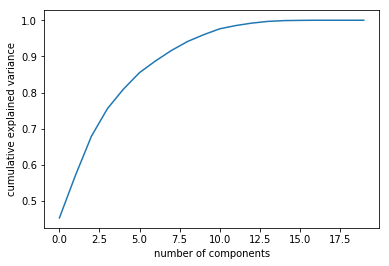

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(train_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

This curve quantifies how much of the total, 20-dimensional variance is contained within the first N components. For example, we see that with the digits the first 5 components contain approximately 85% of the variance, while we need around 10 components to describe close to 100% of the variance.

In [13]:
pca = PCA(n_components=10)
pca.fit(train_x)
pca_train_x = pca.transform(train_x)
pca_test_x = pca.transform(test_x)

In [14]:
%store pca_train_x
%store pca_test_x

Stored 'transformed_train_x' (ndarray)
Stored 'transformed_test_x' (ndarray)


### Linear Discriminant Analysis (LDA)


/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


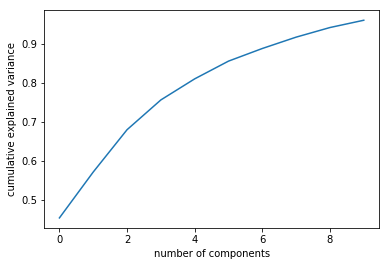

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(train_x,train_y)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

Still, we need around 10 components to describe close to 100% of the variance.


In [16]:
lda = LDA(n_components = 10)
lda_train_x = lda.fit_transform(train_x, train_y)
lda_test_x = lda.transform(test_x)

In [17]:
%store lda_train_x
%store lda_test_x

Stored 'lda_train_x' (ndarray)
Stored 'lda_test_x' (ndarray)


In [18]:
# %run 'KNN.ipynb'

In [24]:
%run 'SVM.ipynb'

Run linear svm with all features(Built-in Algorithm):
In-sample accuracy for svm with Linear kernel: 0.9743290243
Out-of-sample accuracy for svm with Linear kernel: 0.9722076268
-----------------------------------------------------------
Run rbf svm with all features(Built-in Algorithm):
In-sample accuracy for svm with RBF kernel: 0.9806448362
Out-of-sample accuracy for svm with RBF kernel: 0.9722235491
Run linear svm with dimensionality reduction using PCA(Built-in Algorithm)
In-sample accuracy for svm with Linear kernel: 0.9751702488
Out-of-sample accuracy for svm with Linear kernel: 0.9734654884
-----------------------------------------------------------
Run rbf svm with dimensionality reduction using PCA(Built-in Algorithm)
In-sample accuracy for svm with RBF kernel: 0.9781202858
Out-of-sample accuracy for svm with RBF kernel: 0.9633787119
Run linear svm with top 2 features(Built-in Algorithm):
In-sample accuracy for svm with Linear kernel: 0.9629720840
Out-of-sample accuracy for s

In [20]:
# %run 'Random_Forest.ipynb'

In [21]:
# %run 'Decision_Tree.ipynb'

In [22]:
%run 'Gaussian_Naive_Bayes.ipynb'

with all features(Built-in Algorithm):
In-Sample Accuracy:89.5202%
Out-of-Sample Accuracy:90.0253%
